## This code is written to investigate how the cost of living in different countries correlates with the actual quality of life.

In [2]:
# import packages
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [3]:
# read custom correct data
mrg = pd.read_excel('results/merged_m.xlsx')
mrg.head(2)

,Rank,Country,Quality_of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Cost_of_Living_Index,Property_Price_to_Income_Ratio,Traffic_Commute_Time_Index,Pollution_Index,Climate_Index,Region
0,1,Netherlands,196.7,107.8,72.7,77.1,68.6,7.2,25.5,23.7,86.8,Western_Europe
1,2,Denmark,194.7,105.0,73.4,79.2,78.6,6.6,28.5,21.3,81.8,Northern_Europe


In [18]:
# extract the columns you need
X = mrg['Cost_of_Living_Index'].values.reshape(-1,1)
y = mrg['Quality_of_Life_Index'].values.reshape(-1,1)
# create a linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5, 1.0, 'Life Cost vs Life Quality')

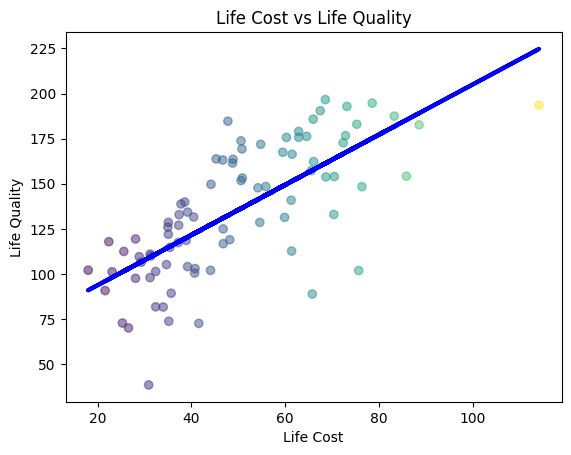

In [22]:
# plot it out
plt.scatter(X, y, c=X, cmap='viridis', alpha=0.5)
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.xlabel('Life Cost')
plt.ylabel('Life Quality')
plt.title('Life Cost vs Life Quality')

In [73]:
cost = 2400
# in EUR per month
NY_cost_of_living = 4900
lcost_index = cost/NY_cost_of_living*100
lqual_index = regr.predict(lcost_index)[0][0]

print('The predicted life quality index for '
      +str(cost)+' EUR life cost is', str(lqual_index.round(1)))
bins = np.percentile(mrg['Quality_of_Life_Index'], np.arange(0, 101, 10))
new_value_bin = np.digitize(lqual_index, bins) 

d = {
  10: "top 10% best",
  9: "top 20% best",
  8: "top 30% best",
  7: "40% best",
  6: "50% best",
  5: "50% worst",
  4: "40% worst",
  3: "top 30% worst",
  2: "top 20% worst",
  1: "top 10% worst"
}

print(f'This index refers to the {d[new_value_bin]} countries in terms of standard of living')

The predicted life quality index for 2400 EUR life cost is 134.1
This index refers to the 50% best countries in terms of standard of living
